Q4.	With the growing consumption of avocados in the USA, a freelance company would like to do some analysis on the patterns of consumption in different cities and would like to come up with a prediction model for the price of avocados. For this to be implemented, build a prediction model using multilinear regression and provide your insights on it.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import pylab
import scipy
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning)
pd.set_option('display.max_columns', 500)

In [2]:
# Importing dataset
data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Multiple Regression\Assignments/Avacado_Price.csv',encoding='latin1',)
data.head()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# checking dimensions of the dataset
data.shape

(18249, 12)

In [4]:
# checking for null values
data.isnull().sum()

AveragePrice    0
Total_Volume    0
tot_ava1        0
tot_ava2        0
tot_ava3        0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values

In [5]:
# checking for duplicate value
data.duplicated().sum()

0

There are no duplicate values

In [6]:
# Descriptive statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total_Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
tot_ava1,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
tot_ava2,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
tot_ava3,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total_Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small_Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large_Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [7]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   tot_ava1      18249 non-null  float64
 3   tot_ava2      18249 non-null  float64
 4   tot_ava3      18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
# Checking for columns in the dataset
data.columns

Index(['AveragePrice', 'Total_Volume', 'tot_ava1', 'tot_ava2', 'tot_ava3',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<AxesSubplot:xlabel='type', ylabel='count'>

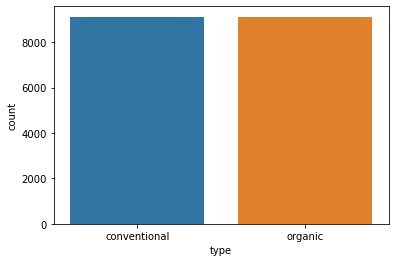

In [9]:
# Countplot for features

sns.countplot(x = data.type) 

    There are equal number of conventional and organic type of avacados in the dataset

In [10]:
# data from different regions
print(data.region.value_counts())
len(data.region.unique())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

54

    There are 54 regions in the dataset

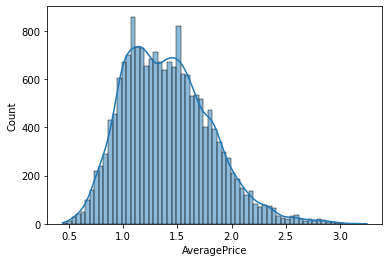

In [11]:
# Plotting histogram to check distribution of the price

sns.histplot(data.AveragePrice,kde=1);
plt.show()

The AvgPrice feature data is normally distributed

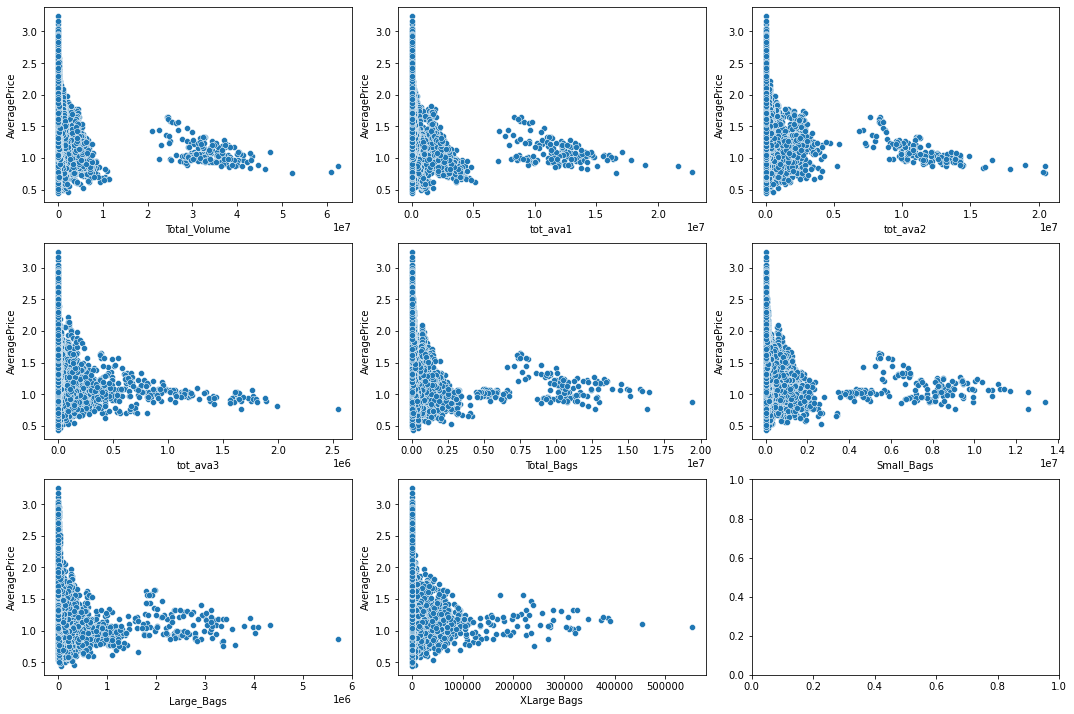

In [12]:
figure,axes = plt.subplots(3,3, figsize = (15,10))
axes = axes.flatten()
index = 0
for col in data.iloc[:,[1,2,3,4,5,6,7,8]]:
    sns.scatterplot(y = data.AveragePrice, x = data[col], ax = axes[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=1)

<AxesSubplot:>

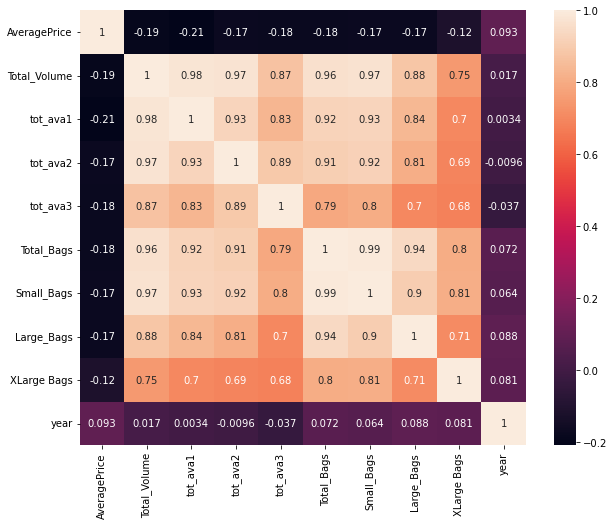

In [13]:
# Checking correlation between features
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

    The independent features have low correlation with the AveragePrice but are highly correlated with each other.

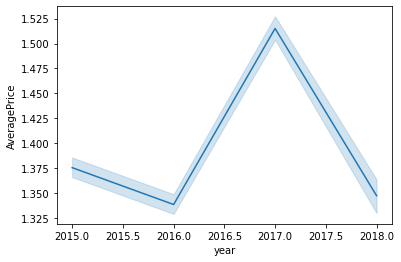

In [14]:
# Lineplot
sns.lineplot(x = data.year, y=data.AveragePrice)
plt.show()

    The Average price was the highest in year 2017 and later fell down in 2018

In [15]:
# Distribution of data year wise
data.groupby(data.year).mean()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags
year,,,,,,,,,
2015,1.375590,7.810274e+05,304443.451708,313633.844367,25426.962520,137523.105437,113033.429256,23520.285037,969.390611
2016,1.338640,8.584206e+05,271567.466578,297850.478632,28468.633371,260533.986204,197025.327568,59940.587974,3568.070662
2017,1.515128,8.623393e+05,288716.905194,269964.124350,15941.542779,287712.119423,213728.158838,69790.115367,4193.843471
2018,1.347531,1.066928e+06,355323.868904,314628.606698,17694.903387,379271.564429,278349.820795,95358.015340,5563.728295


    Total number of bags increased yearly, where contribution of Small bags were the most 

In [16]:
data.groupby(data.region).mean()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
region,,,,,,,,,,
Albany,1.561036,4.753787e+04,1.824082e+03,3.762121e+04,162.832337,7.929747e+03,6.647765e+03,1.153496e+03,128.488639,2016.147929
Atlanta,1.337959,2.621453e+05,1.461169e+05,3.121851e+04,311.385769,8.449856e+04,5.160573e+04,3.207004e+04,822.786036,2016.147929
BaltimoreWashington,1.534231,3.985619e+05,3.565622e+04,2.459829e+05,12466.730976,1.044561e+05,1.009397e+05,2.903985e+03,612.382722,2016.147929
Boise,1.348136,4.264257e+04,2.001951e+04,3.461682e+03,3186.787840,1.597459e+04,1.384004e+04,2.103634e+03,30.915207,2016.147929
Boston,1.530888,2.877929e+05,4.994610e+03,2.142199e+05,4982.294970,6.359609e+04,5.890659e+04,4.438365e+03,251.124231,2016.147929
BuffaloRochester,1.516834,6.793630e+04,1.776671e+03,3.166395e+04,144.335976,3.435134e+04,3.037998e+04,3.729050e+03,242.313432,2016.147929
California,1.395325,3.044324e+06,1.180376e+06,1.039915e+06,94204.276746,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929,2016.147929
Charlotte,1.606036,1.051939e+05,2.237814e+04,3.662802e+04,11578.467574,3.460930e+04,3.149069e+04,2.912684e+03,205.927781,2016.147929
Chicago,1.556775,3.955690e+05,3.208308e+04,2.545190e+05,59069.204290,4.989763e+04,4.377116e+04,5.005547e+03,1120.925178,2016.147929


    San Fransisco and SpringField cities have the highest Average Price for avacados. 
    Total volumes of avacados are the most in California and SouthCentral.

In [17]:
data.groupby(data.type).mean()

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year
type,,,,,,,,,,
conventional,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


    Organic avacados seems to be more expensive than conventional ones.
    Conversely, conventional avacados are ordered the most, maybe because of the price difference.
    Large volume hence large number of bags are sold.

In [18]:
# # Dropping irrelevant features
# data.drop(columns=['region'], axis =1, inplace=True)

In [19]:
# Converting categorical to numerical data

data = pd.get_dummies(columns=['type','region'], data = data, drop_first=True)

In [20]:
data.head(5)

,AveragePrice,Total_Volume,tot_ava1,tot_ava2,tot_ava3,Total_Bags,Small_Bags,Large_Bags,XLarge Bags,year,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Splitting into independent and dependent features

x = data.drop(['AveragePrice'],axis = 1)
y = data.AveragePrice

In [22]:
# Checking for multi-collinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

x = add_constant(x)
vif = pd.DataFrame()
vif['variables'] = x.columns

vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

x_vif = vif[vif.vif < 10] # Using only variables with vif values less than 10

x_vif

,variables,vif
9,year,1.050585
10,type_organic,1.118573
11,region_Atlanta,1.966494
12,region_BaltimoreWashington,1.970251
13,region_Boise,1.964092
14,region_Boston,1.968840
15,region_BuffaloRochester,1.963301
16,region_California,2.054145
17,region_Charlotte,1.964796
18,region_Chicago,1.983952


The VIF for the features having value less than 10, have no collinearity, whereas values greater than 10 are collinear and can be dropped.

In [23]:
# Cretaing new independent variables dataframe with significant features
columns = x_vif.variables.values
X = x[columns]

# Train Test Split

In [24]:
# Using train test split

from sklearn import model_selection

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X, y, test_size = 0.25)

In [25]:
# Shape of train test data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((13686, 55), (4563, 55), (13686,), (4563,))

# Normalization

In [26]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.transform(X_test)

In [27]:
# Fitting the train data to the model
import statsmodels.api as sm

mms_X_train = sm.add_constant(mms_X_train)
mms_X_test = sm.add_constant(mms_X_test)

best_model = sm.OLS(Y_train, mms_X_train).fit()

In [28]:
# Summary of the model
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     309.7
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:56:56   Log-Likelihood:                -1468.7
No. Observations:               13686   AIC:                             3049.
Df Residuals:                   13630   BIC:                             3471.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2637      0.017     73.389      0.000       1.230       1.297
x1             0.1222      0.007     16.560      0.000       0.108       0.137
x2             0.4995      0.005    108.203      0.000       0.490       0.509
x3            -0.2200      0.024     -9.246      0.000      -0.267      -0.173
x4            -0.0271      0.024     -1.142      0.254      -0.074       0.019
x5            -0.2120      0.025     -8.599      0.000      -0.260      -0.164
x6            -0.0333      0.024     -1.404      0.160      -0.080       0.013
x7            -0.0338      0.024     -1.417      0.157      -0.081       0.013
x8            -0.1590      0.024     -6.716      0.000      -0.205      -0.113
x9             0.0419      0.024      1.768      0.077      -0.005       0.088
x10            0.0001      0.024      0.004      0.996      -0.047       0.047
x11           -0.3597      0.024    -15.077      0.000      -0.407      -0.313
x12           -0.3202      0.024    -13.561      0.000      -0.366      -0.274
x13           -0.4711      0.024    -19.973      0.000      -0.517      -0.425
x14           -0.3541      0.024    -14.465      0.000      -0.402      -0.306
x15           -0.2762      0.024    -11.565      0.000      -0.323      -0.229
x16           -0.0554      0.024     -2.339      0.019      -0.102      -0.009
x17           -0.2285      0.024     -9.529      0.000      -0.276      -0.182
x18           -0.0372      0.024     -1.550      0.121      -0.084       0.010
x19            0.2485      0.024     10.329      0.000       0.201       0.296
x20           -0.5108      0.024    -21.469      0.000      -0.557      -0.464
x21           -0.2458      0.024    -10.121      0.000      -0.293      -0.198
x22           -0.0387      0.024     -1.643      0.100      -0.085       0.007
x23           -0.1824      0.024     -7.697      0.000      -0.229      -0.136
x24           -0.3306      0.024    -13.978      0.000      -0.377      -0.284
x25           -0.2684      0.024    -11.236      0.000      -0.315      -0.222
x26           -0.1274      0.024     -5.360      0.000      -0.174      -0.081
x27           -0.1547      0.024     -6.553      0.000      -0.201      -0.108
x28           -0.3485      0.024    -14.665      0.000      -0.395      -0.302
x29           -0.2615      0.024    -10.731      0.000      -0.309      -0.214
x30            0.1766      0.024      7.356      0.000       0.130       0.224
x31            0.0326      0.024      1.353      0.176      -0.015       0.080
x32           -0.0741      0.024     -3.107      0.002      -0.121      -0.027
x33           -0.0456      0.024     -1.912      0.056      -0.092       0.001
x34            0.0839      0.024      3.529      0.000       0.037       0.130
x35           -0.3426      0.024    -14.256      0.000      -0.390      -0.295
x3

Certain variables can be seen having p-values greater than 0.05

Removing these variables as these do not contribute to predict the price of the car 

In [29]:
# Predicting for test data
from sklearn.metrics import r2_score
best_pred_test = best_model.predict(mms_X_test)

# RMSE Error calculation for test data

res_test = Y_test - best_pred_test
rmse_test = np.sqrt(np.mean(res_test * res_test))

r2_score_test = r2_score(Y_test,best_pred_test)  
print(f'\nR2-score value for test data : {r2_score_test}')
print(f'\nRMSE for test data : {rmse_test}')

print('------------------------------------------------------------------------')

# Predicting for train data
best_pred_train = best_model.predict(mms_X_train)

# RMSE Error calculation for train data

res_train = np.array(Y_train) - best_pred_train
rmse_train = np.sqrt(np.mean(res_train * res_train))

r2_score_train = r2_score(Y_train, best_pred_train)  
print(f'\nR2-Score value for train data : {r2_score_train}')
print(f'\nRMSE for train data : {rmse_train}')


R2-score value for test data : 0.5554666225393683

RMSE for test data : 0.2656619259509788
------------------------------------------------------------------------

R2-Score value for train data : 0.5555029329644581

RMSE for train data : 0.26938139155380064


In [35]:
best_model.pvalues[best_model.pvalues > 0.05]

x4     0.253634
x6     0.160369
x7     0.156527
x9     0.077033
x10    0.996483
x18    0.121098
x22    0.100498
x31    0.176055
x33    0.055924
x39    0.884403
x51    0.088770
dtype: float64

In [36]:
# Creating new dataframe without insignificant variables

list1 = [3,5,6,8,9,17,21,30,32,38,50]  # Checking which variables have pvalue greater than 0.05

X_new = pd.DataFrame([])
for i in range(X.shape[1]):
    if i not in list1:
        col = X.columns[i]
        X_new[col] = X.iloc[:,i]
X_new.head()

,year,type_organic,region_Atlanta,region_Boise,region_California,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_NorthernNewEngland,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
X_new_train,X_new_test,Y_train,Y_test = model_selection.train_test_split(X_new, y, test_size = 0.2)
mms_X_new_train = mms.fit_transform(X_new_train)
mms_X_new_test = mms.transform(X_new_test)

mms_X_new_train = sm.add_constant(mms_X_new_train)
mms_X_new_test = sm.add_constant(mms_X_new_test)

new_model = sm.OLS(Y_train, mms_X_new_train).fit()

# Summary of the model
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     415.5
Date:                Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:59:43   Log-Likelihood:                -1586.4
No. Observations:               14599   AIC:                             3263.
Df Residuals:                   14554   BIC:                             3604.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2483      0.006    211.760      0.000       1.237       1.260
x1             0.1180      0.007     16.556      0.000       0.104       0.132
x2             0.4994      0.004    111.628      0.000       0.491       0.508
x3            -0.2017      0.017    -11.928      0.000      -0.235      -0.169
x4            -0.1910      0.017    -11.202      0.000      -0.224      -0.158
x5            -0.1501      0.017     -8.772      0.000      -0.184      -0.117
x6            -0.3372      0.017    -19.844      0.000      -0.371      -0.304
x7            -0.2952      0.017    -17.133      0.000      -0.329      -0.261
x8            -0.4550      0.017    -26.725      0.000      -0.488      -0.422
x9            -0.3290      0.017    -19.061      0.000      -0.363      -0.295
x10           -0.2481      0.017    -14.767      0.000      -0.281      -0.215
x11           -0.0344      0.017     -2.040      0.041      -0.067      -0.001
x12           -0.2071      0.017    -12.147      0.000      -0.241      -0.174
x13            0.2927      0.017     17.250      0.000       0.259       0.326
x14           -0.4898      0.017    -28.770      0.000      -0.523      -0.456
x15           -0.2228      0.017    -13.022      0.000      -0.256      -0.189
x16           -0.1658      0.017     -9.757      0.000      -0.199      -0.133
x17           -0.3164      0.017    -18.271      0.000      -0.350      -0.282
x18           -0.2573      0.017    -15.064      0.000      -0.291      -0.224
x19           -0.0989      0.017     -5.789      0.000      -0.132      -0.065
x20           -0.1389      0.018     -7.932      0.000      -0.173      -0.105
x21           -0.3173      0.017    -18.544      0.000      -0.351      -0.284
x22           -0.2331      0.017    -13.945      0.000      -0.266      -0.200
x23            0.1762      0.017     10.209      0.000       0.142       0.210
x24           -0.0613      0.017     -3.559      0.000      -0.095      -0.028
x25            0.0975      0.017      5.580      0.000       0.063       0.132
x26           -0.3101      0.017    -18.218      0.000      -0.343      -0.277
x27           -0.1912      0.017    -11.058      0.000      -0.225      -0.157
x28           -0.1128      0.017     -6.479      0.000      -0.147      -0.079
x29           -0.2269      0.017    -13.396      0.000      -0.260      -0.194
x30           -0.2524      0.017    -14.575      0.000      -0.286      -0.218
x31           -0.3100      0.017    -18.179      0.000      -0.343      -0.277
x32            0.0833      0.017      4.917      0.000       0.050       0.116
x33           -0.1427      0.017     -8.182      0.000      -0.177      -0.109
x34            0.2552      0.017     15.041      0.000       0.222       0.288
x35           -0.1083      0.017     -6.350      0.000      -0.142      -0.075
x3

In [38]:
# Predicting for test data

from sklearn.metrics import r2_score
best_pred_test = new_model.predict(mms_X_new_test)

# RMSE Error calculation for test data

res_test = Y_test - best_pred_test
rmse_test = np.sqrt(np.mean(res_test * res_test))

r2_score_test = r2_score(Y_test,best_pred_test)  
print(f'\nR2-score value for test data : {r2_score_test}')
print(f'\nRMSE for test data : {rmse_test}')


R2-score value for test data : 0.5434870588275376

RMSE for test data : 0.26514698011394233


In [39]:
# Predicting for train data
best_pred_train = new_model.predict(mms_X_new_train)

# RMSE Error calculation for train data

res_train = np.array(Y_train) - best_pred_train
rmse_train = np.sqrt(np.mean(res_train * res_train))

r2_score_train = r2_score(Y_train, best_pred_train)  
print(f'\nR2-Score value for train data : {r2_score_train}')
print(f'\nRMSE for train data : {rmse_train}')


R2-Score value for train data : 0.5567918473965958

RMSE for train data : 0.26974704678693023
